In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import os

1, What scale of measurement applies to timeseries data? is timeseries data continuous or discrete? why?

* Interval scale of measurement applies to timeseries data as interval scale contains properties of nominal and ordered data. This type of data shows both the order of the variables and the exact differences between the variables.

* Timeseries data is a continuous data.

* the values that can be broken down into different parts, units, fractions and decimals.Continuous data can be measured even if it is broken down.

2, What does ARIMA stand for?Break down and explain each piece in the name.

* ARIMA - Autoregressive Integrated Moving Average


* AR(Autoregressive) -This model that shows a changing variable that regresses on its own prior or lagged values. It predicts future values based on past values. 

* I(integrated) - It observes the difference between static data values and previous values. The goal is to achieve stationary data that is not subject to seasonality.

* MA(Moving Average) - It is the dependency between an observed value and a residual error from a moving average model applied to previous observations.The past and present errors are used to predict future values

3, Using the data in the temperatures/folder. Write a function that efficently converts every column to a different temperature scale:one that is more common than kelvin.

In [3]:
df = pd.read_csv("temperature.csv",parse_dates=True, index_col='datetime')
df.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,289.17,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,282.28,NaN,283.04,294.93,291.40,291.64,297.15,284.70,285.18,...,283.42,NaN,271.80,280.65,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Converting to celsius 
# 0 celsius = 273.15 kelvin
# formula :- celsius = kelvin - 273.15
def celsius_conv(df):
    New_df = df.apply(lambda num: num-273.15)
    print(New_df)
    

In [4]:
celsius_conv(df)

                     Vancouver   Portland  San Francisco   Seattle  \
datetime                                                             
2012-10-01 12:00:00        NaN        NaN            NaN       NaN   
2012-10-01 13:00:00  11.480000   8.930000      16.330000  8.650000   
2012-10-01 14:00:00  11.479041   8.933252      16.324993  8.647217   
2012-10-01 15:00:00  11.476998   8.941867      16.310618  8.639833   
2012-10-01 16:00:00  11.474955   8.950481      16.296243  8.632449   
...                        ...        ...            ...       ...   
2017-11-29 20:00:00        NaN   8.850000            NaN  7.670000   
2017-11-29 21:00:00        NaN   9.740000            NaN  8.500000   
2017-11-29 22:00:00        NaN  10.240000            NaN  9.600000   
2017-11-29 23:00:00        NaN   9.870000            NaN  9.810000   
2017-11-30 00:00:00        NaN   9.130000            NaN  9.890000   

                     Los Angeles  San Diego  Las Vegas    Phoenix  \
datetime            

4, Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.

In [18]:
def fill_missing(df): 
    df_interpolate = df.interpolate(limit_area='inside')
    New_df = df_interpolate.isna().sum().sum()
    print(New_df)    

In [19]:
fill_missing(df)

7955


5, Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.

Summar_start_n_end = 21/06 and ends on 22/09

winter_start_n_end = 21/12 and ends on 20/03 
 


In [85]:
# Did not included 2012 data as the dataframe doesnot have data ecorded for summer months 
summer_2013 = df.loc['2013-06-21' :"2013-09-22"]
summer_2014 = df.loc['2014-06-21' :"2014-09-22"]
summer_2015 = df.loc['2015-06-21' :"2015-09-22"]
summer_2016 = df.loc['2016-06-21' :"2016-09-22"]
summer_2017 = df.loc['2017-06-21' :"2017-09-22"]

frames = [summer_2013, summer_2014, summer_2015, summer_2016, summer_2017]
result = pd.concat(frames)
result.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2013-06-21 00:00:00,290.9600,289.791500,293.285250,289.469000,297.22900,294.989000,306.857750,310.696500,306.042750,302.967750,...,295.751500,295.215,292.4300,293.154000,289.9480,296.923333,292.848,294.820,294.82,292.420250
2013-06-21 01:00:00,291.2100,287.992667,291.367667,287.492667,297.32600,295.542667,303.684333,308.559333,303.234333,297.917667,...,295.409333,293.280,291.2300,292.209333,289.9480,296.310000,292.848,295.930,295.93,291.967667
2013-06-21 02:00:00,288.6655,287.844333,290.744333,287.144333,296.06100,293.794333,302.027667,305.677667,300.877667,296.044333,...,293.677667,292.863,289.0755,291.427667,289.4355,296.035000,299.150,293.290,293.74,292.194333
2013-06-21 03:00:00,289.7700,287.780250,289.672750,288.440250,294.80275,292.445250,304.477750,307.720250,301.262750,297.975250,...,291.425250,291.320,288.7200,288.767750,288.9230,295.760000,302.150,295.119,294.82,292.797750
2013-06-21 04:00:00,288.7200,287.660000,288.900000,288.640000,293.54000,290.830000,304.190000,306.480000,299.820000,297.370000,...,289.520000,290.560,288.4800,287.360000,288.9230,296.370000,303.150,296.948,297.02,293.150000


In [84]:
summer_avg = result.mean()

summer_avg_df = summer_avg.to_frame()
summer_avg_df.head()

,0
Vancouver,277.628945
Portland,278.553542
San Francisco,284.470667
Seattle,278.687762
Los Angeles,286.411063


In [83]:

mapping_1 = {summer_avg_df.columns[0]:'Average summer temp'}
summer_avg_df_2= summer_avg_df.rename(columns=mapping_1)

summer_df = summer_avg_df_2.reset_index()
mapping = {summer_df.columns[0]:'City'}
summer_df2 = summer_df.rename(columns=mapping)
summer_df2.head()

,City,Average summer temp
0,Vancouver,291.319624
1,Portland,292.847146
2,San Francisco,292.290178
3,Seattle,291.437919
4,Los Angeles,296.283479


In [82]:
#21/12 and ends on 20/03

winter_2013 = df.loc['2012-12-21' :"2013-03-20"]
winter_2014 = df.loc['2013-12-21' :"2014-03-20"]
winter_2015 = df.loc['2014-12-21' :"2015-03-20"]
winter_2016 = df.loc['2015-12-21' :"2016-03-20"]
winter_2017 = df.loc['2016-12-21' :"2017-03-20"]
frames = [winter_2013, winter_2014, winter_2015, winter_2016, winter_2017]
result = pd.concat(frames)
result.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-21 00:00:00,276.75,279.95,283.46,277.88,287.23,286.31,279.14,284.44,269.37,263.15,...,278.72,278.85,273.96,277.71,288.15,288.150,288.150,290.21,290.21,287.29
2012-12-21 01:00:00,277.01,280.42,281.84,278.02,285.71,284.57,278.08,282.64,268.65,262.86,...,277.69,278.55,273.96,276.81,288.15,289.150,283.150,290.21,290.21,287.29
2012-12-21 02:00:00,277.06,279.78,279.97,278.14,284.09,283.44,276.23,281.09,267.93,263.64,...,276.87,277.96,273.90,276.47,287.04,289.150,282.486,290.21,290.21,287.29
2012-12-21 03:00:00,277.48,279.19,279.27,277.93,283.50,282.99,275.15,280.18,267.22,262.18,...,275.56,277.38,273.82,276.04,287.04,287.470,288.270,290.21,290.21,287.29
2012-12-21 04:00:00,277.48,278.52,278.92,277.95,282.60,282.30,274.62,279.29,266.60,262.03,...,275.19,276.81,273.70,275.90,287.59,286.116,284.941,290.21,290.21,287.29


In [81]:
winter_avg = result.mean()

winter_avg_df = winter_avg.to_frame()
winter_avg_df.head()

,0
Vancouver,277.628945
Portland,278.553542
San Francisco,284.470667
Seattle,278.687762
Los Angeles,286.411063


In [80]:
# Giving name as Avg winter tem for the mean values that we got on result
mapping_1 = {winter_avg_df.columns[0]:'Average winter temp'}
#renaming the column 
winter_avg_df_2= winter_avg_df.rename(columns=mapping_1)

#did reset index,so that can the data starting from 0 index and i will be easy to add two df's
winter_df = winter_avg_df_2.reset_index()
mapping = {winter_df.columns[0]:'City'}
winter_df2 = winter_df.rename(columns=mapping)
winter_df2.head()

,City,Average winter temp
0,Vancouver,277.628945
1,Portland,278.553542
2,San Francisco,284.470667
3,Seattle,278.687762
4,Los Angeles,286.411063


In [79]:
summer_winter_df = pd.merge(summer_df2, winter_df2, on='City')
summer_winter_df.head()

,City,Average summer temp,Average winter temp
0,Vancouver,291.319624,277.628945
1,Portland,292.847146,278.553542
2,San Francisco,292.290178,284.470667
3,Seattle,291.437919,278.687762
4,Los Angeles,296.283479,286.411063


In [90]:
CITY_A = []
CITY_B = []

for x in range(len(summer_winter_df['City'])):
    city_A = summer_winter_df.iloc[x,0]
    summer = summer_winter_df.iloc[x,1]
    winter = summer_winter_df.iloc[x,2]
    
    for y in range(len(summer_winter_df['City'])):
        if city_A != summer_winter_df.iloc[y,0]:
            if (summer > summer_winter_df.iloc[y,1]) & (winter > summer_winter_df.iloc[y,2]):
                CITY_A .append(city_A)
                CITY_B .append(summer_winter_df.iloc[y,0])



In [98]:
comparison_df = pd.DataFrame(list(zip(CITY_A, CITY_A)), columns=['City A', 'City B'])
comparison_df.head()

,City A,City B
0,Portland,Portland
1,San Francisco,San Francisco
2,San Francisco,San Francisco
3,Seattle,Seattle
4,Los Angeles,Los Angeles


6, For two of the cities you found in question 5(there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average(MA) model.

* A rolling average will continuously updates the average of a data set to include all the data in the set until that point and a moving average calculates the average of a data set for a specified period.

In [134]:
# I took 10 cities summer avg temp data, for two cities its not showing much rolling avg graph, so calculated for 10 cities.
cities_data = summer_winter_df.iloc[0:10,:2]
cities_data

,City,Average summer temp
0,Vancouver,291.319624
1,Portland,292.847146
2,San Francisco,292.290178
3,Seattle,291.437919
4,Los Angeles,296.283479
5,San Diego,294.974887
6,Las Vegas,304.011702
7,Phoenix,305.690815
8,Albuquerque,294.982222
9,Denver,293.634515


In [136]:
cities_data[ 'rolling_avg' ] = cities_data.iloc[:,:].rolling(window=3).mean()
cities_data[ 'rolling_avg' ]

0           NaN
1           NaN
2    292.152316
3    292.191748
4    293.337192
5    294.232095
6    298.423356
7    301.559135
8    301.561580
9    298.102518
Name: rolling_avg, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Average summer temp'>

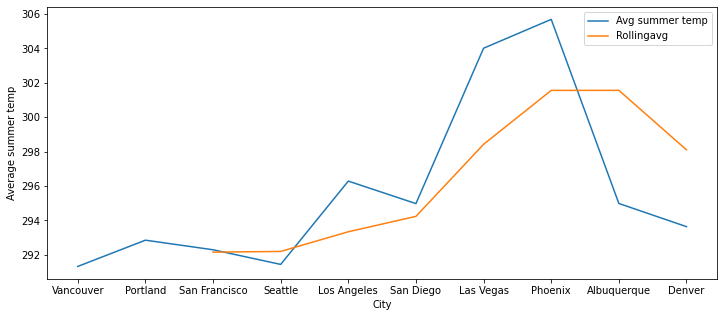

In [139]:
plt.figure( figsize = ( 12, 5))
sns.lineplot( x = 'City',
             y = 'Average summer temp',
             data = Two_cities_data,
             label = 'Avg summer temp')
  
# ploting rolling average
sns.lineplot( x = 'City',
             y = 'rolling_avg',
             data = cities_data,
             label = 'Rollingavg')

7, Perform SARIMA on five cities, iterating through the cities programmatically. Explain our results.

a, Graph the predicted values 30 days out.

In [13]:
df = df.dropna()

In [14]:
five_cities_df = df.iloc[:, :5]
five_cities_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles
datetime,,,,,
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503
2012-10-01 17:00:00,284.622911,282.109096,289.431869,281.775065,291.852162
...,...,...,...,...,...
2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000
2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000
2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000


Text(0, 0.5, 'temperature')

<Figure size 1440x360 with 0 Axes>

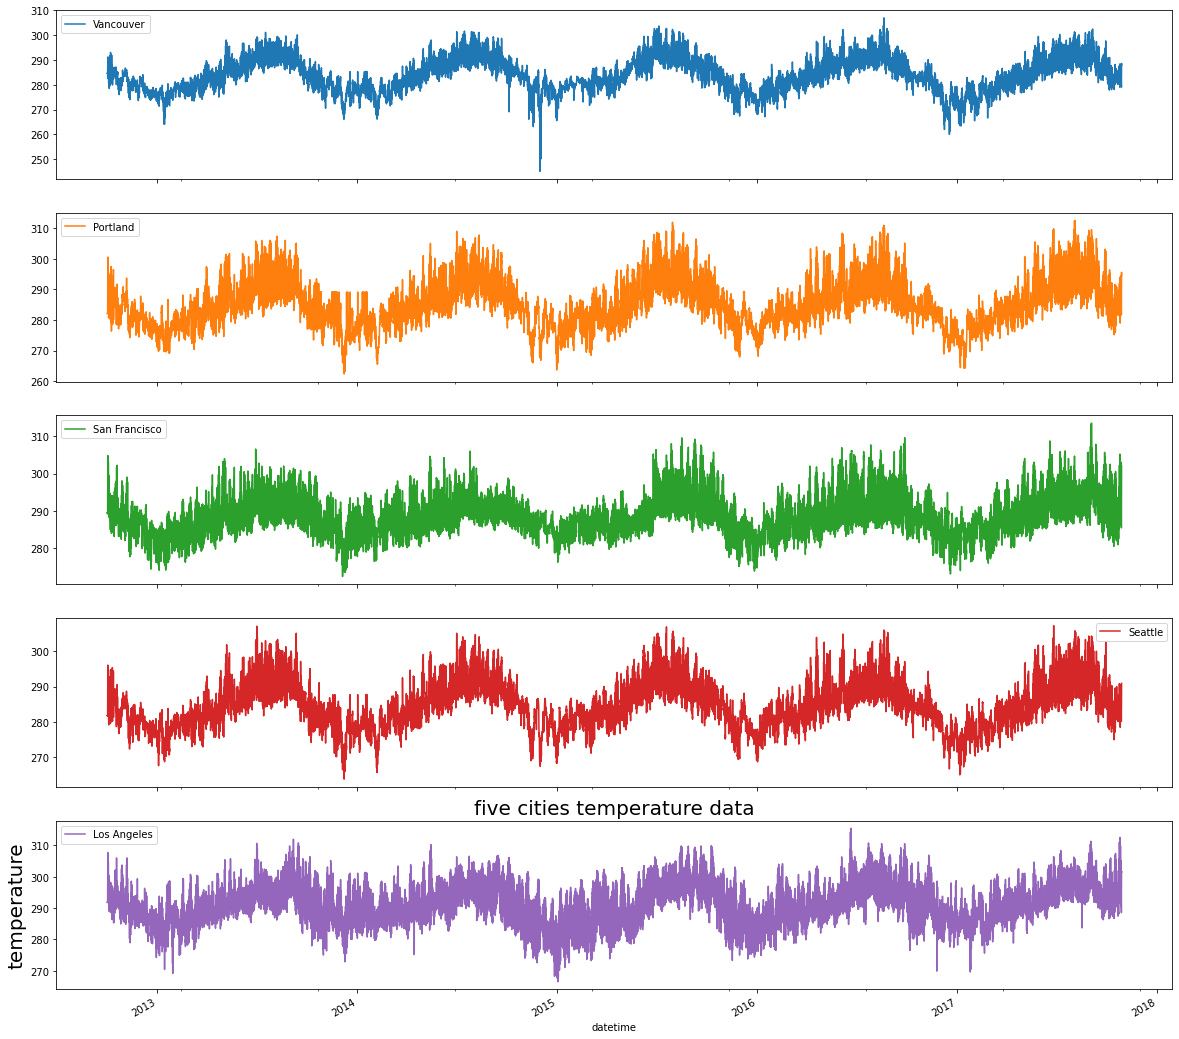

In [15]:
plt.figure(figsize=(20,5))
#plt.plot(lim_fivecities_data, subplot=True)
five_cities_df.plot(subplots=True, figsize=(20, 20))
plt.title('five cities temperature data', fontsize=20)
plt.ylabel("temperature", fontsize=20)

<AxesSubplot:xlabel='datetime'>

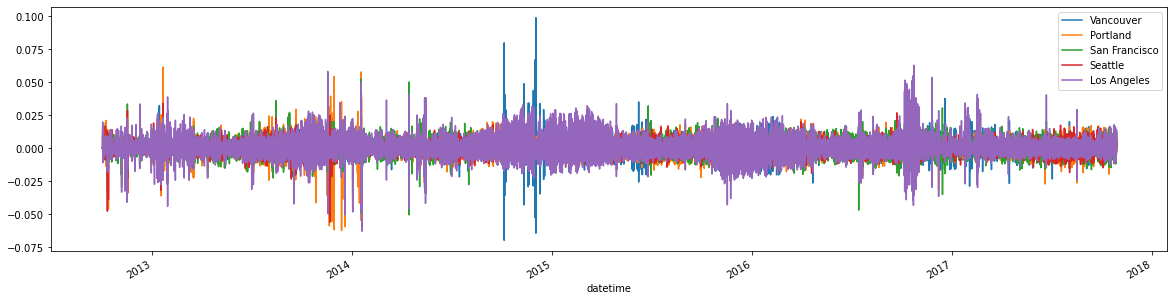

In [16]:
# Converting the data to stationary process
Return = five_cities_df.pct_change()
Return.plot(figsize=(20,5))

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

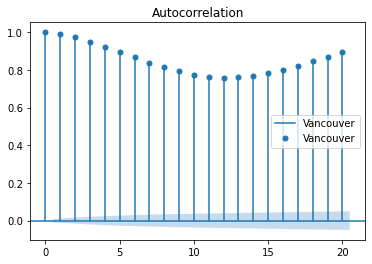

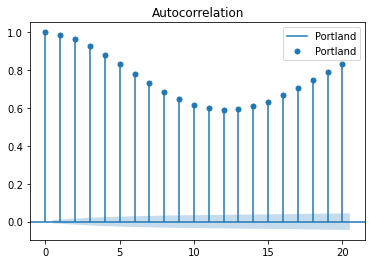

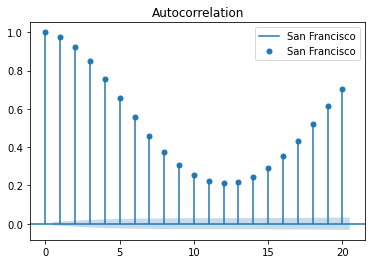

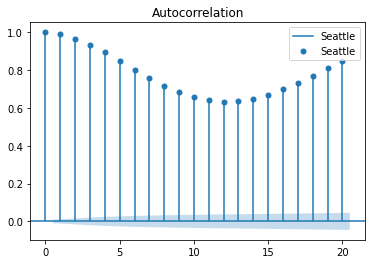

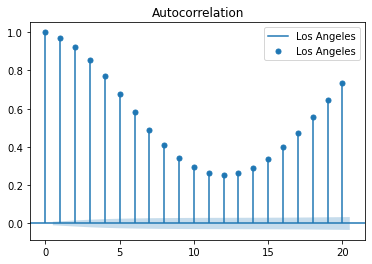

In [9]:
plot_acf(five_cities_df["Vancouver"], lags = 20, missing='drop', label = 'Vancouver')
plt.legend()
plot_acf(five_cities_df["Portland"], lags = 20, missing='drop', label = 'Portland')
plt.legend()
plot_acf(five_cities_df["San Francisco"], lags = 20, missing='drop', label = 'San Francisco')
plt.legend()
plot_acf(five_cities_df["Seattle"], lags = 20, missing='drop', label = 'Seattle')
plt.legend()
plot_acf(five_cities_df["Los Angeles"], lags = 20, missing='drop', label = 'Los Angeles')
plt.legend()

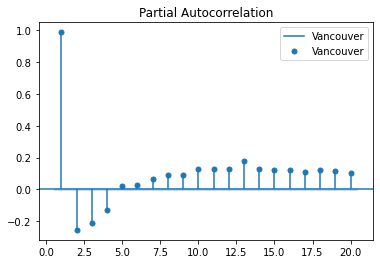

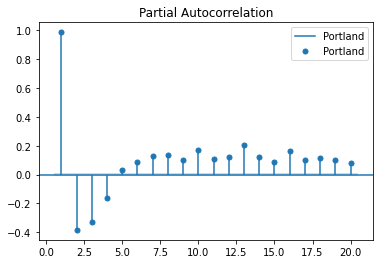

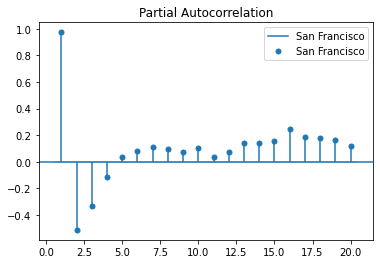

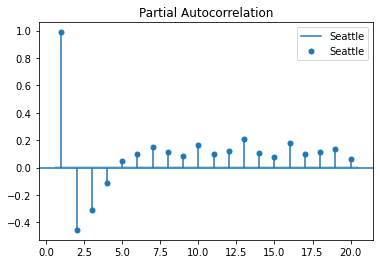

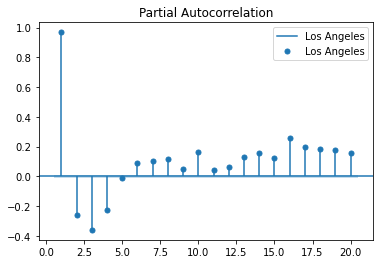

In [10]:
plot_pacf(five_cities_df["Vancouver"], lags = 20, zero = False, label = 'Vancouver')
plt.legend()
plot_pacf(five_cities_df["Portland"], lags = 20, zero = False, label = 'Portland')
plt.legend()
plot_pacf(five_cities_df["San Francisco"], lags = 20, zero = False, label = 'San Francisco')
plt.legend()
plot_pacf(five_cities_df["Seattle"], lags = 20, zero = False, label = 'Seattle')
plt.legend()
plot_pacf(five_cities_df["Los Angeles"], lags = 20, zero = False, label = 'Los Angeles')
plt.legend()

In [23]:
data = five_cities_df["Vancouver"].dropna()
order = (1,1,1)
seasonal_order= (1,1,1,12)

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
results = model.fit(low_memory=True)

/Users/anushakatta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/anushakatta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


8, Explain what you see when you perform results.summary() on the cities in question 7.

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Vancouver   No. Observations:                44430
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -57732.215
Date:                            Thu, 09 Dec 2021   AIC                         115474.431
Time:                                    15:57:24   BIC                         115517.938
Sample:                                         0   HQIC                        115488.134
                                          - 44430                                         
Covariance Type:                           approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9647      0.001    713.440      0.000       0.962       0.967
ma.L1         -0.9991      0.000  -4109.565      0.000      -1.000      -0.999
ar.S.L12      -0.4222      0.005    -90.076      0.000      -0.431      -0.413
ma.S.L12      -0.9227      0.003   -281.429      0.000      -0.929      -0.916
sigma2         0.7873      0.005    149.027      0.000       0.777       0.798
===================================================================================
Ljung-Box (L1) (Q):                  73.80   Jarque-Bera (JB):           3712557.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

### as per the above summary, p-values shows 0 means it is the better seasonal model for citiy Vancouver, i did tried to compare the model (1,0,1,12) which deosn't gave the best result and these (1,1,1,12) model gives the low AIC and BIC which means seasonal ARIMA is a good fit for the data. 